# Problem 2
Authors: Fabian Boemer, Sid Murching, Suraj Nair, Alex Cui

In [4]:
import numpy as np
import matplotlib.pyplot as plt

## 2C:
Fill in these functions to train your SVD

In [2]:
def grad_U(Ui, Yij, Vj, reg, eta):
    """
    Takes as input Ui (the ith row of U), a training point Yij, the column
    vector Vj (jth column of V^T), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Ui multiplied by eta.
    """
    return (1-reg*eta)*Ui + eta * Vj * (Yij - np.dot(Ui,Vj))     

def grad_V(Vj, Yij, Ui, reg, eta):
    """
    Takes as input the column vector Vj (jth column of V^T), a training point Yij,
    Ui (the ith row of U), reg (the regularization parameter lambda),
    and eta (the learning rate).

    Returns the gradient of the regularized loss function with
    respect to Vj multiplied by eta.
    """
    return (1-reg*eta)*Vj + eta * Ui * (Yij - np.dot(Ui,Vj))

def get_err(U, V, Y, reg=0.0):
    """
    Takes as input a matrix Y of triples (i, j, Y_ij) where i is the index of a user,
    j is the index of a movie, and Y_ij is user i's rating of movie j and
    user/movie matrices U and V.

    Returns the mean regularized squared-error of predictions made by
    estimating Y_{ij} as the dot product of the ith row of U and the jth column of V^T.
    """
    # Compute mean squared error on each data point in Y; include
    # regularization penalty in error calculations.
    # We first compute the total squared squared error
    err = 0.0
    for (i,j,Yij) in Y:
        err += 0.5 *(Yij - np.dot(U[i-1], V[:,j-1]))**2
    # Add error penalty due to regularization if regularization
    # parameter is nonzero
    if reg != 0:
        U_frobenius_norm = np.linalg.norm(U, ord='fro')
        V_frobenius_norm = np.linalg.norm(V, ord='fro')
        err += 0.5 * reg * (U_frobenius_norm ** 2)
        err += 0.5 * reg * (V_frobenius_norm ** 2)
    # Return the mean of the regularized error
    return err / float(len(Y))

def train_model(M, N, K, eta, reg, Y, eps=0.0001, max_epochs=300):
    """
    Given a training data matrix Y containing rows (i, j, Y_ij)
    where Y_ij is user i's rating on movie j, learns an
    M x K matrix U and N x K matrix V such that rating Y_ij is approximated
    by (UV)_ij.

    Uses a learning rate of <eta> and regularization of <reg>. Stops after
    <max_epochs> epochs, or once the magnitude of the decrease in regularized
    MSE between epochs is smaller than a fraction <eps> of the decrease in
    MSE after the first epoch.

    Returns a tuple (U, V, err) consisting of U, V, and the unregularized MSE
    of the model.
    """
    # Initialize U, V  
    U = np.random.random((M,K)) - 0.5
    V = np.random.random((K,N)) - 0.5
    size = Y.shape[0]
    delta = None
    indices = np.arange(size)    
    for epoch in range(max_epochs):
        # Run an epoch of SGD
        before_E_in = get_err(U, V, Y, reg)
        np.random.shuffle(indices)
        for ind in indices:
            (i,j, Yij) = Y[ind]
            # Update U[i], V[j]
            U[i-1] = grad_U(U[i-1], Yij, V[:,j-1], reg, eta)
            V[:,j-1] = grad_V(V[:,j-1], Yij, U[i-1], reg, eta);
        # At end of epoch, print E_in
        E_in = get_err(U, V, Y, reg)
        print("Epoch %s, E_in (regularized MSE): %s"%(epoch + 1, E_in))

        # Compute change in E_in for first epoch
        if epoch == 0:
            delta = before_E_in - E_in

        # If E_in doesn't decrease by some fraction <eps>
        # of the initial decrease in E_in, stop early            
        elif before_E_in - E_in < eps * delta:
            break
    return (U, V, get_err(U, V, Y))

## 2D:
Run the cell below to get your graphs

Factorizing with  943  users,  1682  movies.
Epoch 1, E_in (regularized MSE): 0.5789167213588239
Epoch 2, E_in (regularized MSE): 0.44250476173844416
Epoch 3, E_in (regularized MSE): 0.40400501816022094
Epoch 4, E_in (regularized MSE): 0.37978584081253564
Epoch 5, E_in (regularized MSE): 0.35793999405203564
Epoch 6, E_in (regularized MSE): 0.346134496625561
Epoch 7, E_in (regularized MSE): 0.3354746927686722
Epoch 8, E_in (regularized MSE): 0.3289190680064417
Epoch 9, E_in (regularized MSE): 0.32249815851219854
Epoch 10, E_in (regularized MSE): 0.3145056589235059
Epoch 11, E_in (regularized MSE): 0.31680870881566836
Epoch 1, E_in (regularized MSE): 0.5829880441281704
Epoch 2, E_in (regularized MSE): 0.4014775962089239
Epoch 3, E_in (regularized MSE): 0.3475935192877866
Epoch 4, E_in (regularized MSE): 0.31534652734985374
Epoch 5, E_in (regularized MSE): 0.29235844262799277
Epoch 6, E_in (regularized MSE): 0.278902219631334
Epoch 7, E_in (regularized MSE): 0.26451864380599727
Epoch 8, E

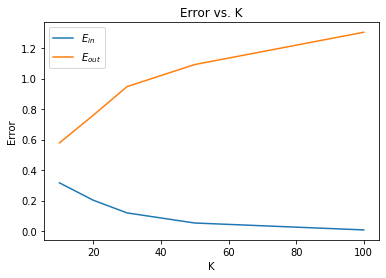

In [3]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
print("Factorizing with ", M, " users, ", N, " movies.")
Ks = [10,20,30,50,100]

reg = 0.0
eta = 0.03 # learning rate
E_in = []
E_out = []

# Use to compute Ein and Eout
for K in Ks:
    U,V, err = train_model(M, N, K, eta, reg, Y_train)
    E_in.append(err)
    E_out.append(get_err(U, V, Y_test))

plt.plot(Ks, E_in, label='$E_{in}$')
plt.plot(Ks, E_out, label='$E_{out}$')
plt.title('Error vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2d.png')

## 2E:
Run the cell below to get your graphs. This might take a long time to run, but it should take less than 2 hours. I would encourage you to validate your 2C is correct.

Training model with M = 943, N = 1682, k = 10, eta = 0.03, reg = 0.0001
Epoch 1, E_in (regularized MSE): 0.5864830471368983
Epoch 2, E_in (regularized MSE): 0.44476054692847655
Epoch 3, E_in (regularized MSE): 0.4025917144304262
Epoch 4, E_in (regularized MSE): 0.3802126779347337
Epoch 5, E_in (regularized MSE): 0.3619170382132685
Epoch 6, E_in (regularized MSE): 0.34911109098144477
Epoch 7, E_in (regularized MSE): 0.3388690130235968
Epoch 8, E_in (regularized MSE): 0.33067105874566055
Epoch 9, E_in (regularized MSE): 0.32043358137554956
Epoch 10, E_in (regularized MSE): 0.31846591658412937
Epoch 11, E_in (regularized MSE): 0.3146134363509542
Epoch 12, E_in (regularized MSE): 0.31070105505828066
Epoch 13, E_in (regularized MSE): 0.30597167973603817
Epoch 14, E_in (regularized MSE): 0.3045885949847551
Epoch 15, E_in (regularized MSE): 0.30403124239899715
Training model with M = 943, N = 1682, k = 20, eta = 0.03, reg = 0.0001
Epoch 1, E_in (regularized MSE): 0.5801091790434217
Epoch 2, E

Epoch 9, E_in (regularized MSE): 0.18323181965610763
Epoch 10, E_in (regularized MSE): 0.17300584061127164
Epoch 11, E_in (regularized MSE): 0.1654800044868503
Epoch 12, E_in (regularized MSE): 0.15861503816034925
Epoch 13, E_in (regularized MSE): 0.15303459094991656
Epoch 14, E_in (regularized MSE): 0.1496896676167778
Epoch 15, E_in (regularized MSE): 0.14435048789206972
Epoch 16, E_in (regularized MSE): 0.139807651648412
Epoch 17, E_in (regularized MSE): 0.13815696312274867
Epoch 18, E_in (regularized MSE): 0.13302677098712773
Epoch 19, E_in (regularized MSE): 0.12901221621547368
Epoch 20, E_in (regularized MSE): 0.12841895856038382
Training model with M = 943, N = 1682, k = 50, eta = 0.03, reg = 0.001
Epoch 1, E_in (regularized MSE): 0.5743213138482881
Epoch 2, E_in (regularized MSE): 0.30911292815680935
Epoch 3, E_in (regularized MSE): 0.2354782675063011
Epoch 4, E_in (regularized MSE): 0.1949365409722438
Epoch 5, E_in (regularized MSE): 0.1657483519322904
Epoch 6, E_in (regularize

Epoch 23, E_in (regularized MSE): 0.04804383253886424
Epoch 24, E_in (regularized MSE): 0.04597374898747358
Epoch 25, E_in (regularized MSE): 0.04522167511687245
Epoch 26, E_in (regularized MSE): 0.04408928478032479
Epoch 27, E_in (regularized MSE): 0.04260124823476817
Epoch 28, E_in (regularized MSE): 0.04195904443957768
Training model with M = 943, N = 1682, k = 100, eta = 0.03, reg = 0.01
Epoch 1, E_in (regularized MSE): 0.6442706422706441
Epoch 2, E_in (regularized MSE): 0.22233698349793474
Epoch 3, E_in (regularized MSE): 0.14372971420339367
Epoch 4, E_in (regularized MSE): 0.10445909620091999
Epoch 5, E_in (regularized MSE): 0.08160125684857222
Epoch 6, E_in (regularized MSE): 0.06545215573317766
Epoch 7, E_in (regularized MSE): 0.055340407065547534
Epoch 8, E_in (regularized MSE): 0.04549834522427512
Epoch 9, E_in (regularized MSE): 0.03907457671500864
Epoch 10, E_in (regularized MSE): 0.03374887502526215
Epoch 11, E_in (regularized MSE): 0.02967629385033936
Epoch 12, E_in (regu

Epoch 3, E_in (regularized MSE): 1.0277382802986919
Epoch 4, E_in (regularized MSE): 1.0180737366981873
Epoch 5, E_in (regularized MSE): 0.997216957146431
Epoch 6, E_in (regularized MSE): 1.0092005600185006


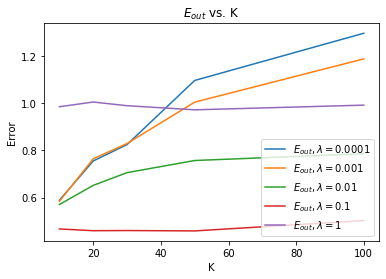

In [5]:
Y_train = np.loadtxt('./data/train.txt').astype(int)
Y_test = np.loadtxt('./data/test.txt').astype(int)

M = max(max(Y_train[:,0]), max(Y_test[:,0])).astype(int) # users
N = max(max(Y_train[:,1]), max(Y_test[:,1])).astype(int) # movies
Ks = [10,20,30,50,100]

regs = [10**-4, 10**-3, 10**-2, 10**-1, 1]
eta = 0.03 # learning rate
E_ins = []
E_outs = []

# Use to compute Ein and Eout
for reg in regs:
    E_ins_for_lambda = []
    E_outs_for_lambda = []

    for k in Ks:
        print("Training model with M = %s, N = %s, k = %s, eta = %s, reg = %s"%(M, N, k, eta, reg))
        U,V, e_in = train_model(M, N, k, eta, reg, Y_train)
        E_ins_for_lambda.append(e_in)
        eout = get_err(U, V, Y_test)
        E_outs_for_lambda.append(eout)

    E_ins.append(E_ins_for_lambda)
    E_outs.append(E_outs_for_lambda)


# Plot values of E_in across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_ins[i], label='$E_{in}, \lambda=$'+str(regs[i]))
plt.title('$E_{in}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()
plt.savefig('2e_ein_solu.png')	
plt.clf()

# Plot values of E_out across k for each value of lambda
for i in range(len(regs)):
    plt.plot(Ks, E_outs[i], label='$E_{out}, \lambda=$'+str(regs[i]))
plt.title('$E_{out}$ vs. K')
plt.xlabel('K')
plt.ylabel('Error')
plt.legend()	
plt.savefig('2e_eout_solu.png')		
